In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [15]:
data=pd.read_csv(r"/content/spam.csv",encoding="Latin_1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [16]:
data.shape

(5573, 5)

In [17]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5523
Unnamed: 3    5561
Unnamed: 4    5567
dtype: int64

In [18]:
data=data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1 )

In [19]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [20]:
data.shape

(5573, 2)

In [21]:
data=data.rename(columns={"v1":"label", "v2":"text"})

In [22]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [23]:
data.label.value_counts()

ham     4826
spam     747
Name: label, dtype: int64

In [24]:
data['label_num']=data.label.map({'ham':0,'spam':1})

In [25]:
data

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [26]:
data['length']=data['text'].apply(len)

In [27]:
data


,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125
5571,ham,Rofl. Its true to its name,0,26


from matplotlib import pyplot as plt
data['label_num'].plot(kind='hist', bins=20, title='label_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='label_num', y='length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['label_num'].plot(kind='line', figsize=(8, 4), title='label_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='label_num', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='length', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

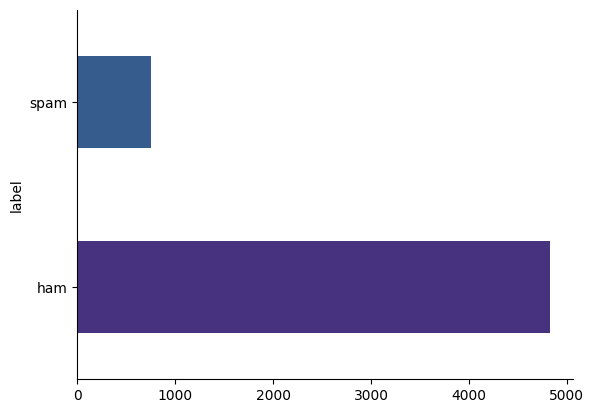

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
x=np.array(data['text'])
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ...,
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name',
       'Hi babe its me thanks for coming even though it didnt go that well!i just wanted my bed! Hope to see you soon love and kisses xxx'],
      dtype=object)

In [29]:
y=np.array(data['label_num'])
y

array([0, 0, 1, ..., 0, 0, 0])

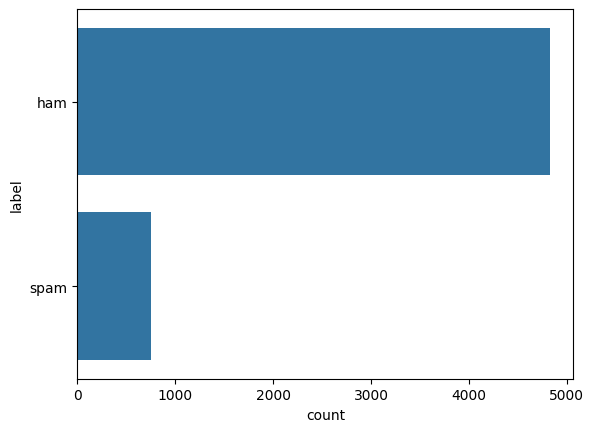

In [30]:
import seaborn as sns
sns.countplot(data["label"])
sns.set_palette("viridis")
plt.show()

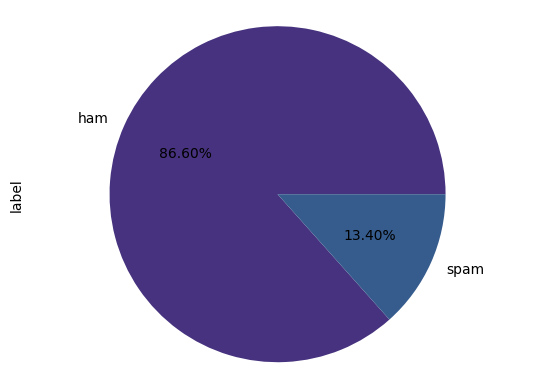

In [31]:
data["label"].value_counts().plot(kind="pie",autopct="%2.2f%%")
sns.set_palette("viridis")
plt.axis("equal")
plt.show()

In [32]:
spam1=data.loc[data['label']=='spam']
spam1["text"].head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: text, dtype: object

In [33]:
spam1=data.loc[data['label']=='ham']
spam1["text"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: text, dtype: object

In [34]:
x_train=np.array(data.iloc[0:500,1])
x_train[0:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

In [35]:
x_train=np.array(data.iloc[0:500,0])
x_train[0:6]

array(['ham', 'ham', 'spam', 'ham', 'ham', 'spam'], dtype=object)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [39]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
model=MultinomialNB()
model.fit(train_data,y_train)

MultinomialNB()

In [42]:
pred=model.predict(test_data)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
model.score(test_data,y_test)

0.9838516746411483

In [44]:
from sklearn.metrics import classification_report
nbreport=classification_report(y_test, pred)
print(nbreport)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1450
           1       0.95      0.92      0.94       222

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [46]:
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]

In [47]:
x=["f1score","recall","precision"]
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]
df = pd.DataFrame(dict(x=x, y=y))
df

,x,y
0,f1score,0.938215
1,recall,0.923423
2,precision,0.953488


from matplotlib import pyplot as plt
_df_0['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('x').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['x'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='y', y='x', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

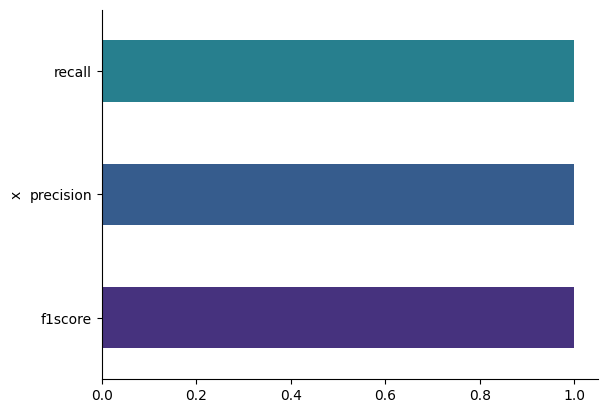

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('x').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

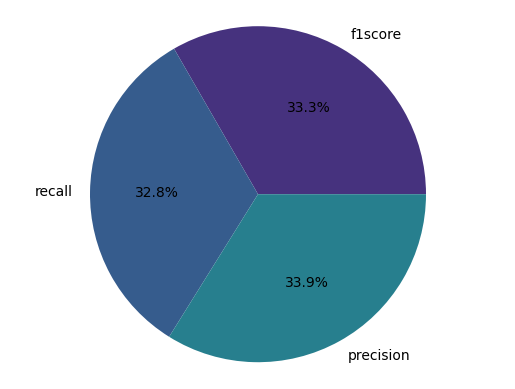

In [48]:
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis("equal")
plt.show()

In [49]:
x_test=[ "hi how are you",
        "Free entry in 2 a wkly comp to win FA Cup fina...",
        "when will you go to home",
        "i will call you back",
        "are you busy now"]

In [50]:
x_test.append("goodmoring")
x_test.append("WINNER!! As a valued network customer you have...")

In [51]:
x_test

['hi how are you',
 'Free entry in 2 a wkly comp to win FA Cup fina...',
 'when will you go to home',
 'i will call you back',
 'are you busy now',
 'goodmoring',
 'WINNER!! As a valued network customer you have...']

In [52]:
x_test1=np.array(x_test)
x_test1

array(['hi how are you',
       'Free entry in 2 a wkly comp to win FA Cup fina...',
       'when will you go to home', 'i will call you back',
       'are you busy now', 'goodmoring',
       'WINNER!! As a valued network customer you have...'], dtype='<U49')

In [53]:
X_train=data.iloc[0:200,1]
X_train[0:6]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: text, dtype: object

In [54]:
Y_train=data.iloc[0:200,0]
Y_train[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [56]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(x_test1)

In [57]:
train_data.shape

(200, 1159)

In [58]:
test_data.shape

(7, 1159)

In [59]:
Y_train.shape

(200,)

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
model=MultinomialNB()
model.fit(train_data,Y_train)

MultinomialNB()

In [62]:
pred=model.predict(test_data)
pred

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam'], dtype='<U4')

In [63]:
y1=model.predict(test_data)

In [64]:
y1

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam'], dtype='<U4')

In [65]:
df = pd.DataFrame(dict(INPUT=x_test1, OUTPUT=y1))
df

,INPUT,OUTPUT
0,hi how are you,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,when will you go to home,ham
3,i will call you back,ham
4,are you busy now,ham
5,goodmoring,ham
6,WINNER!! As a valued network customer you have...,spam


In [66]:
df.iloc[4:]

,INPUT,OUTPUT
4,are you busy now,ham
5,goodmoring,ham
6,WINNER!! As a valued network customer you have...,spam
